
<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="780" height="140" align="right"/>

<p align="center">Curso: Programación Para el Analisis de datos</p>

<p align="center"> Código Curso: 203008069 </p>

<p align="center"> Grupo: 13 </p>

 <p align="center"> Tarea 1 - Principios básicos de programación científica</p>

 <p align="center">  Presentado por: Juan José García Sánchez</p>

<p align="center"> Código: 1005095836</p>

 <p align="center"> Tutor(a): Miguel Angel Vargas Valencia </p>

 <p align="center"> 01/10/2024</p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA </p>



In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Ejercicio 1: Estructuras Básicas de Datos con Python

El ejercicio puede realizar por medio de iteración o de comprensiones de listas
En este caso, se realizara por medio de iteraciones for

In [25]:
#formato de los datos: 
#familiares (llaves): "nombre,apellido"
#informacion: (edad (años), peso(kg), altura(metros), estudia(booleano))

info_familiares = {
    "Sebastia,Garcia":(22, 68, 1.85, False), # hermano medio
    "Pablo,Garcia":   (18, 70, 1.72, True),  # hermano menor
    "Marleny,Alvarez":(72, 80, 1.60, False), # abuela materna
    "Arnoldo,Sanchez":(80, 78, 1.72, False), # abuela materno
    "Cielo,Sanchez":  (54, 54, 1.60, False), # madre
    "Carlos,Garcia":  (50, 68, 1.72, False), # padre
    "Andrew,Garcia":   (30, 80, 1.72, False), # hermanastro paterno
    "Luz,Hernandez":  (60, 70, 1.65, False)  # tia paterna
}

## definir funcion promedio

In [26]:
def promedio(datos):
    """
    promedio de listas, usando la funcion suma
    """
    return sum(dato for dato in datos) / len(datos)

## mostrando estadisticas

In [30]:
agregados = { 
    "edades" : list(),
    "pesos" : list(),
    "alturas" : list(),
    "esta_estudiando" : list()
}

for edad, peso, altura, estudia in info_familiares.values():
    agregados["edades"].append(edad)
    agregados["pesos"].append(peso)
    agregados["alturas"].append(altura)
    agregados["esta_estudiando"].append(estudia)


for variable in ("edades", "pesos", "alturas"):
    pro = promedio(agregados[variable])

    print(f"el promedio de {variable:<7} en mi grupo familiar: {pro:.2f}")


el promedio de edades  en mi grupo familiar: 48.25
el promedio de pesos   en mi grupo familiar: 71.00
el promedio de alturas en mi grupo familiar: 1.70


el promedio de altura se ve sesgado por la altura de los hombre, que en general es mayor que las mujeres. Tambien se acerca al promedio de altura colombiano (1.72)

# Ejercicio 2: Estructuras de Datos y DataFrames

In [31]:
# cargando datos de las atenciones medicas anexo 1

df1 = pd.read_csv("base_atenciones_medicas.csv", delimiter=";")
df2 = pd.read_csv("Anexo 2 - Base de Datos CSV.csv")
datos_cancer = load_breast_cancer(as_frame=True)
df3 = datos_cancer.data

In [32]:
# se definen las funciones del ejercicio

def mostrar_campos(panel):
    for nombre, datos in panel.items():
        print(f"Mostrando datos para: {nombre}")
        print(datos.columns)

def mostrar_cantidad_campos(panel):
    mayor_nombre = len(max((key for key in panel.keys()), key=len))
    
    for nombre, datos in panel.items():
        print(f"cantidad registros para base {nombre: <{mayor_nombre}} : {len(datos)}")
    

In [33]:
panel = {
    "atencion_medica":df1,
    "vivenda":df2,
    "cancer_pecho":df3
}

In [34]:
mostrar_campos(panel)

Mostrando datos para: atencion_medica
Index(['Empresa', 'Turno', 'Día de la semana', 'Experiencia del conductor',
       'Formación del Paramédico', 'Nivel del Paramédico',
       'Cantidad de atenciones', 'Distancia recorrida (Km)',
       'Velocidad máxima (Km/h)', 'Consumo de combustible (Galones)',
       'Tiempo en Movimiento (h)', 'Tiempo motor ON (h)'],
      dtype='object')
Mostrando datos para: vivenda
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Mostrando datos para: cancer_pecho
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'conca

In [35]:
mostrar_cantidad_campos(panel)

cantidad registros para base atencion_medica : 2200
cantidad registros para base vivenda         : 3000
cantidad registros para base cancer_pecho    : 569


In [66]:
val = df3['worst fractal dimension']

# Ejercicio 3: Gráficos científicos.

## Grafico 1:

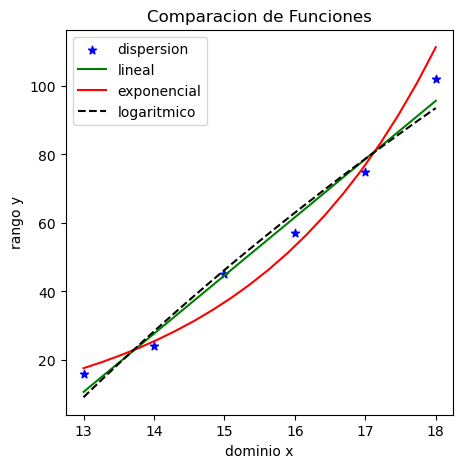

In [62]:
# graficando puntos de dispersion

x = [13, 14, 15, 16, 17, 18]
y = [16, 24, 45, 57 , 75, 102]

fig1 = plt.figure(figsize=(5,5))

ax = fig1.add_subplot(1, 1, 1)

ax.scatter(x, y, color="b", marker="*", label="dispersion")

# graficando la funcion lineal dada

rango = np.linspace(13,18, 20)

y_lineal = 17*rango - 210.3333

ax.plot(rango, y_lineal, "g-", label="lineal")

# graficando la funcion exponencial

y_exp = 0.1452*np.exp(0.369*rango)

ax.plot(rango, y_exp, "r-", label="exponencial")

# graficando la funcion logaritmica

y_log = 259.49*np.log(rango) - 656.46

ax.plot(rango, y_log, color="k", linestyle="--", label="logaritmico")

# fijar elementos extras del grafico

ax.set_title("Comparacion de Funciones")

ax.set_xlabel("dominio x")

ax.set_ylabel("rango y")

ax.legend()

# mostrar finalmente el grafico creado

plt.show()

### Analisis de grafico

## Grafico 2: Histogramas

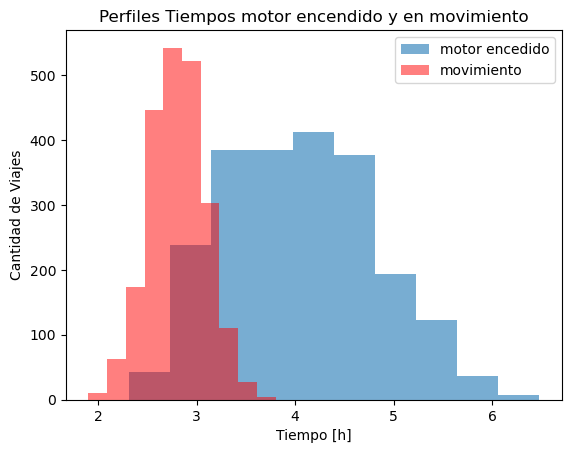

In [60]:
plt.hist(df1["Tiempo motor ON (h)"], alpha=0.6, label="motor encedido")

plt.hist(df1["Tiempo en Movimiento (h)"], color="r", alpha=0.5, label="movimiento")

plt.title("Perfiles Tiempos motor encendido y en movimiento")

plt.xlabel("Tiempo [h]")

plt.ylabel("Cantidad de Viajes")

plt.legend()

plt.show()

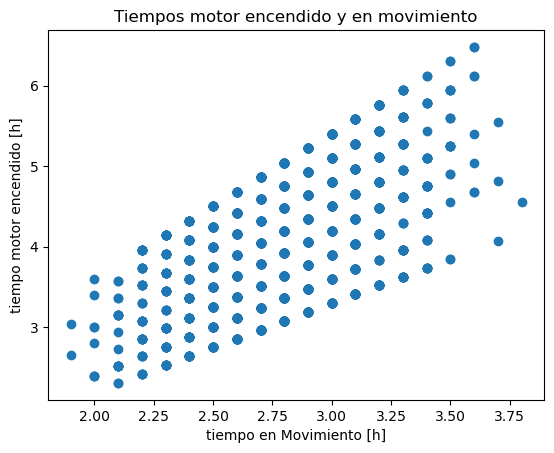

In [59]:
plt.scatter(df1["Tiempo en Movimiento (h)"], df1["Tiempo motor ON (h)"])

plt.title("Tiempos motor encendido vs. en movimiento")

plt.xlabel("tiempo en Movimiento [h]")

plt.ylabel("tiempo motor encendido [h]")

plt.show()

### Analisis de histogramas

Se puede ver que los graficos estan desplazados uno frente al otro, el de motor encendido frente al grafico de movimiento. Si los tiempos con el motor encendido y en movimiento fueran similares, ambos graficos deberian aproximadamente coincidir, por lo que, en general, las ambulancias pasan mas tiempo con el motor encendido que en movimiento. 

En el grafico de tendencia no se presenta como una linea continua unica, ya que se estan graficando todas las empresas y turnos por igual. Se puede observar, que conforme aumente al tiempo en movimiento, tambien aumenta el tiempo que duro 
el motor encedido continuamente. Esto tiene sentido, ya que a mas tiempo en movimento, mas distancia recorrida, y mas demanda al motor.

# Referencias

- Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt
Publishing. (pp. 183-195).
- Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol.
2nd ed. Packt Publishing. (pp. 90-103).
- Thakur, A. (2016). Python: Real-World Data Science. Packt
Publishing. (pp. 199 - 220).
